In [1]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import distance
import matplotlib.pyplot as plt
os.chdir('C:/Users/Admin/Downloads')

In [2]:
pwd

'C:\\Users\\Admin\\Downloads'

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
data.shape

(404290, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


<b>OBSERVATION</b>
<b> question2 has null values in two rows </b>

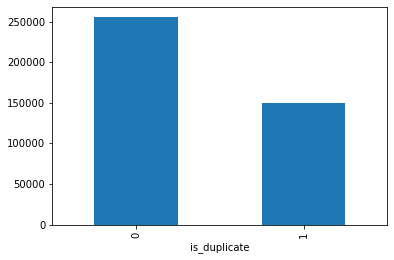

In [7]:
data.groupby('is_duplicate')['id'].count().plot.bar()

<b>OBSERVATIONS</b>

-there are more number of pairs which are dissimilar compared to the number of similar pairs in the dataset.

-similar pairs-37%

-dissmilar pairs-63%

In [8]:
df=data.dropna()
df.shape

(404287, 6)

In [9]:
qids=pd.Series(df['question1'].tolist(),df['question2'].tolist())
qs_unique=len(np.unique(qids))
print("no of unique questions",qs_unique)

qs_morethan_onetime=np.sum(qids.value_counts()>1)
print('questions which appear more than once',qs_morethan_onetime)

percentage=(qs_morethan_onetime/qs_unique)*100
print('percentage of questions more than once',percentage)



no of unique questions 290455
questions which appear more than once 54131
percentage of questions more than once 18.636621851921984


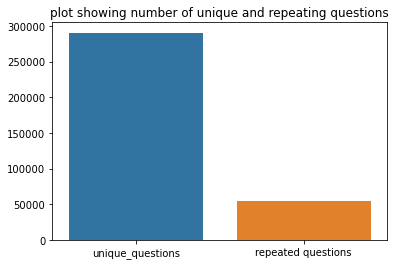

In [10]:
x=['unique_questions','repeated questions']
y=[qs_unique,qs_morethan_onetime]

sns.barplot(x,y)
plt.title('plot showing number of unique and repeating questions')
plt.show()

In [11]:
pair_duplicates=df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()
print(pair_duplicates.shape[0]-df.shape[0])

0


Text(0, 0.5, 'no od questions')

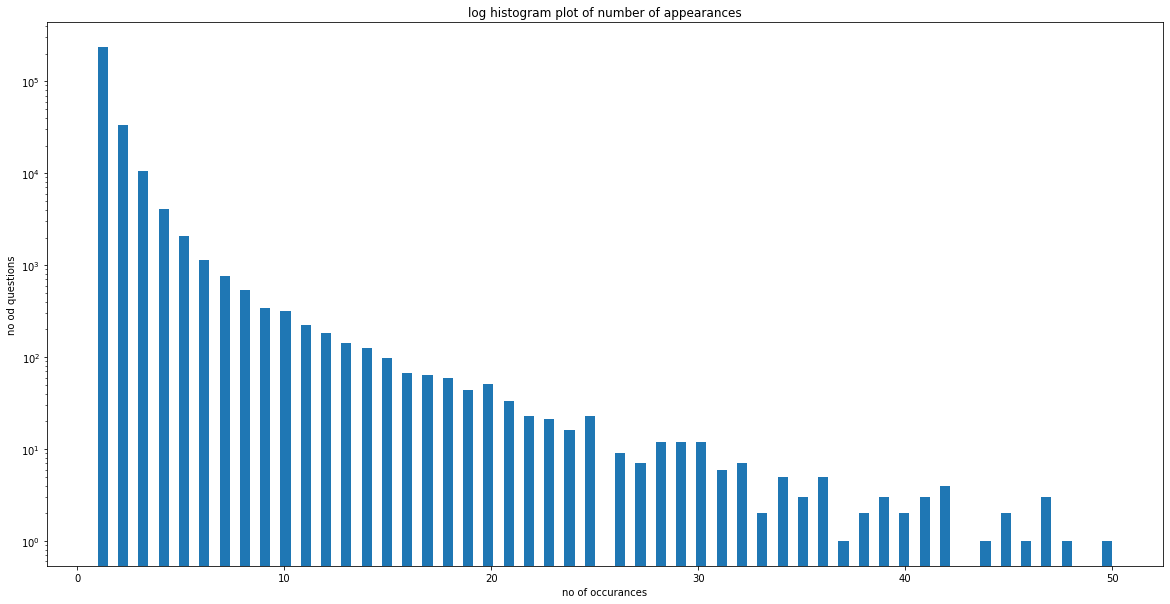

In [12]:
plt.figure(figsize=(20,10))
plt.hist(qids.value_counts(),bins=100)
plt.yscale('log')
plt.title('log histogram plot of number of appearances')
plt.xlabel('no of occurances')
plt.ylabel('no od questions')

<b>FEATURE ENGINEERING</b>

In [13]:
if os.path.isfile('df_new_features.csv'):
    df=pd.read_csv('df_new_features.csv',encoding='latin-1')
else:
    df['freq_id1']=df.groupby('qid1')['qid1'].transform('count')
    df['freq_id2']=df.groupby('qid2')['qid2'].transform('count')
    df['q1_len']=df['question1'].str.len()
    df['q2_len']=df['question2'].str.len()
    df['q1_n_words']=df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words']=df['question2'].apply(lambda row: len(row.split(" ")))
    
    def common_words(row):
        w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
        w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
        return 1.0*len(w1 & w2)
    df['word_common']=df.apply(common_words,axis=1)
    
    def word_total(row):
        w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
        w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
        return 1.0*(len(w1)+len(w2))
    df['word_total']=df.apply(word_total,axis=1)
    
    def word_share(row):
        w1=set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
        w2=set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
        return 1.0*(len(w1 & w2)/(len(w1)+len(w2)))
    df['word_share']=df.apply(word_share,axis=1)
    
    df['freq1+2']=df['freq_id1']+df['freq_id2']
    df['freq1-2']=df['freq_id1']-df['freq_id2']
    
    df.to_csv('df_new_features.csv',index=False)

    
df.head()    
    
        
        
    
    

,id,qid1,qid2,question1,question2,is_duplicate,freq_id1,freq_id2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq1+2,freq1-2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


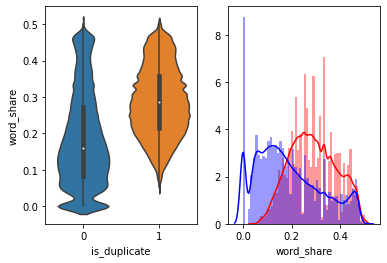

In [14]:
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate',y='word_share',data=df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate']==1.0]['word_share'][0:],label="1",color="red")
sns.distplot(df[df['is_duplicate']==0.0]['word_share'][0:],label="0",color="blue")
plt.show()

<b>word share can be a important feature in the model which we are going to build</b> 

In [15]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from bs4 import BeautifulSoup
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

In [16]:
from fuzzywuzzy import fuzz
def get_token_features(q1,q2):
    token_features=[0.0]*10
    
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])
    
    q1_stop=set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stop=set([word for word in q1_tokens if word in STOP_WORDS])
    
    common_word_count=len(q1_words.intersection(q2_words))
    
    common_stop_count=len(q1_stop.intersection(q2_stop))
    
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[1]=common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[2]=common_stop_count/(min(len(q1_stop),len(q2_stop))+SAFE_DIV)
    token_features[3]=common_stop_count/(max(len(q1_stop),len(q2_stop))+SAFE_DIV)
    token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens))+SAFE_DIV)
    token_features[5]=common_token_count/(max(len(q1_tokens),len(q2_tokens))+SAFE_DIV)
    
    token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])
    
    token_features[7]=int(q1_tokens[0]==q2_tokens[0])
    
    token_features[8]=abs(len(q1_tokens)-len(q2_tokens))
    
    token_features[9]=(len(q1_tokens)+len(q2_tokens))/2
    return token_features

def get_longest_substr_ratio(a,b):
    strs=list(distance.lcsubstrings(a,b))
    if len(strs)==0:
        return 0
    else:
        return len(strs[0])/(min(len(a),len(b))+1)

def extract_features(df):
    df['question1']=df['question1'].fillna("").apply(preprocess)
    df['question2']=df['question2'].fillna("").apply(preprocess)
    
    token_features=df.apply(lambda x:get_token_features(x['question1'],x['question2']),axis=1)
    
    df["cwc_min"]= list(map(lambda x: x[0],token_features))
    df['cwc_max']=list(map(lambda x: x[1],token_features))
    df['csc_min']=list(map(lambda x:x[2],token_features))
    df['csc_max']=list(map(lambda x:x[3],token_features))
    df['ctc_min']=list(map(lambda x:x[4],token_features))
    df['ctc_max']=list(map(lambda x:x[5],token_features))
    df['last_word_eq']=list(map(lambda x:x[6],token_features))
    df['first_word_eq']=list(map(lambda x:x[7],token_features))
    df['abs_len_diff']=list(map(lambda x:x[8],token_features))
    df['mean_len']=list(map(lambda x:x[9],token_features))
    
    df["token_set_ratio"]=df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    df["token_sort_ratio"] = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"] = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"] = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"] = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    
    return df
    

D:\anaconda\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [17]:
if os.path.isfile('nlp_features_train.csv'):
    df=pd.read_csv('nlp_features_train.csv')
else:
    data=pd.read_csv('train.csv')
    df=data.dropna()
    df=extract_features(df)
    df.to_csv('nlp_features_train.csv',index=False)
print(df.head(2))        

   id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate   cwc_min  \
0  what is the step by step guide to invest in sh...             0  0.999980   
1  what would happen if the indian government sto...             0  0.799984   

    cwc_max   csc_min   csc_max  ...   ctc_max  last_word_eq  first_word_eq  \
0  0.833319  0.999983  0.999983  ...  0.785709           0.0            1.0   
1  0.399996  0.999980  0.999980  ...  0.466664           0.0            1.0   

   abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  fuzz_ratio  \
0           2.0      13.0              100                93          93   
1           5.0      12.5               86                63          66   

   fuzz_partial_ratio  longest_substr_ratio  
0                 100        

In [18]:
df.shape

(404287, 21)

In [19]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.999980,0.999980,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,0.399992,0.333328,0.999988,0.999988,...,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667
3,3,7,8,why am i mentally very lonely how can i solve...,find the remainder when math 23 24 math i...,0,0.000000,0.000000,0.999986,0.999986,...,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,0.399992,0.199998,0.999967,0.999967,...,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000


In [20]:
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

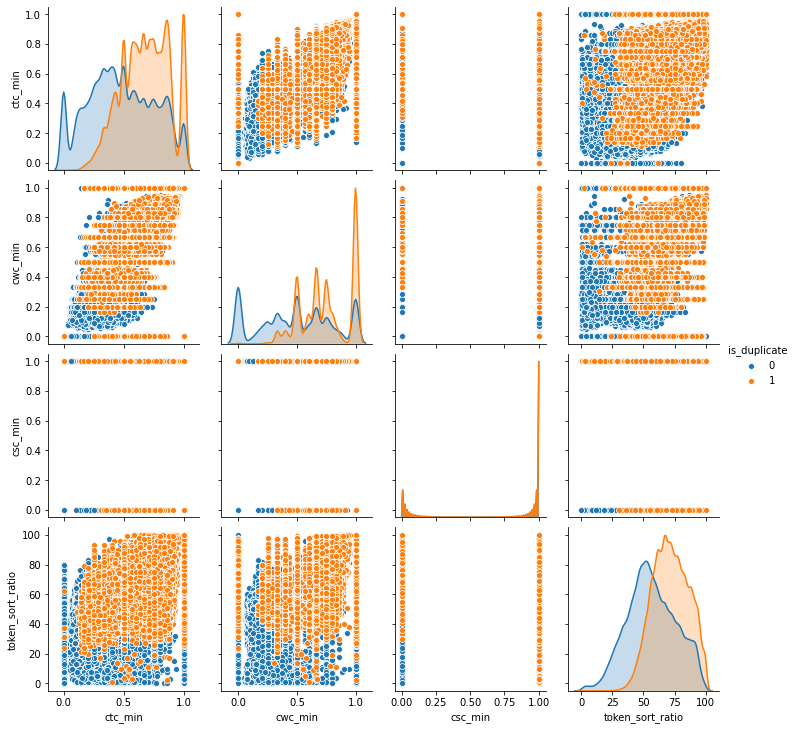

In [21]:
n = df.shape[0]
sns.pairplot(df[['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio', 'is_duplicate']][0:n], hue='is_duplicate', vars=['ctc_min', 'cwc_min', 'csc_min', 'token_sort_ratio'])
plt.show()

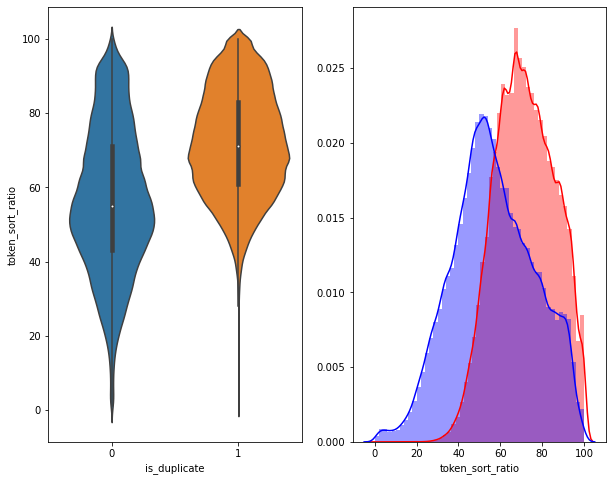

In [22]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'token_sort_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['token_sort_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

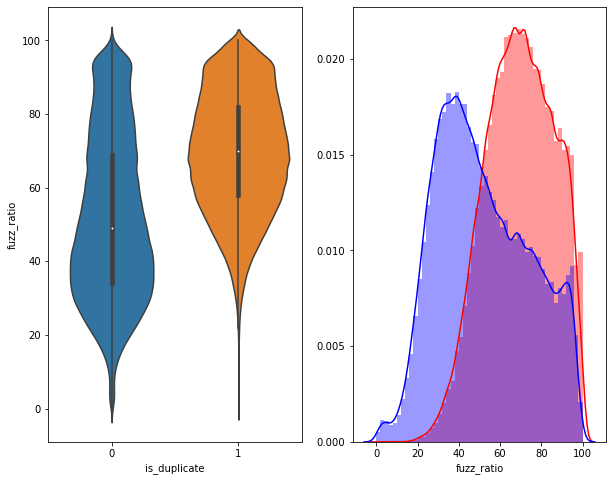

In [23]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_ratio', data = df[0:] , )

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['fuzz_ratio'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['fuzz_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

In [24]:
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

In [25]:
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [26]:
from tqdm import tqdm
questions = list(df['question1']) + list(df['question2'])

tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [27]:
nlp = spacy.load('en_core_web_sm')

vecs1 = []

for qu1 in tqdm(list(df['question1'])):
    doc1 = nlp(qu1) 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        vec1 = word1.vector
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_feats_m'] = list(vecs1)

D:\anaconda\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.2). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
100%|██████████| 404287/404287 [48:52<00:00, 137.85it/s]   


In [28]:
vecs2 = []
for qu2 in tqdm(list(df['question2'])):
    doc2 = nlp(qu2) 
    mean_vec2 = np.zeros([len(doc2), len(doc2[0].vector)])
    for word2 in doc2:
        # word2vec
        vec2 = word2.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        # compute final vec
        mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)
df['q2_feats_m'] = list(vecs2)

100%|██████████| 404287/404287 [55:49<00:00, 120.69it/s] 


In [29]:
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("-----------------------------------------")

if os.path.isfile('df_new_features.csv'):
     dfppro = pd.read_csv("df_new_features.csv",encoding='latin-1')
else:
    print('******************************************')

    

In [39]:
df1 = dfnlp.drop(['qid1','qid2','question1','question2'],axis=1)
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3 = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
df3_q1 = pd.DataFrame(df3.q1_feats_m.values.tolist(), index= df3.index)
df3_q2 = pd.DataFrame(df3.q2_feats_m.values.tolist(), index= df3.index)

In [31]:
dfnlp.head(2)


,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,0.799984,0.399996,0.999980,0.999980,...,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [32]:
dfppro.head(2)


,id,qid1,qid2,question1,question2,is_duplicate,freq_id1,freq_id2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq1+2,freq1-2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [40]:
df1.head(2)

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759
1,1,0,0.799984,0.399996,0.999980,0.999980,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154


In [41]:
df2.head(2)

,id,freq_id1,freq_id2,q1_len,q2_len,q1_n_words,q2_n_words,word_common,word_total,word_share,freq1+2,freq1-2
0,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,4,1,51,88,8,13,4.0,20.0,0.200000,5,3


In [42]:
df3.head(2)

,id,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,q1_feats_m,q2_feats_m
0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,100,93,93,100,0.982759,"[-16.370623737573624, 41.28872585296631, -120....","[-25.64444413781166, 26.047548532485962, -95.3..."
1,1,0.799984,0.399996,0.999980,0.999980,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,"[-5.153761565685272, 29.407748494297266, 17.14...","[75.75496417284012, 43.6778067946434, -57.7947..."


In [43]:
df3_q1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,-16.370624,41.288726,-120.101225,-129.453259,50.179638,88.554592,13.879114,-4.571769,-61.301149,-147.416180,...,-76.549685,94.217909,16.549291,85.400118,-12.254682,-3.303890,125.838971,-128.925700,13.787457,-16.257047
1,-5.153762,29.407748,17.147400,-180.981415,-41.641858,11.015149,-28.173204,12.140333,101.373496,-32.984885,...,-104.062545,-38.389603,-36.593342,74.490523,-102.546748,30.147194,49.553843,-144.807613,112.993783,7.674232


In [44]:
df3_q2.head(2)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,-25.644444,26.047549,-95.399046,-118.616857,47.989248,94.740448,32.452054,-17.028230,-54.050136,-122.665196,...,-60.006209,77.306380,12.635750,91.978540,-1.074837,-17.797469,104.623849,-121.373347,3.462985,-10.377323
1,75.754964,43.677807,-57.794702,-274.100097,-61.141388,54.656453,-144.526519,-25.340867,143.941701,-61.969838,...,-138.233737,44.236689,-90.939371,72.336849,-130.246973,76.594043,62.762805,-173.081437,78.653231,-22.284885


In [50]:
if not os.path.isfile('final_features.csv'):
    df3_q1['id']=df1['id']
    df3_q2['id']=df1['id']
    df1=df1.merge(df2,on='id',how='left')
    df2=df3_q1.merge(df3_q2,on='id',how='left')
    df=df3_q1.merge(df2,on='id',how='left')
    result=df1.merge(df2, on='id',how='left')
    result.to_csv('final_features.csv')

In [52]:
result.head(2)

,id,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,...,-60.006209,77.306380,12.635750,91.978540,-1.074837,-17.797469,104.623849,-121.373347,3.462985,-10.377323
1,1,0,0.799984,0.399996,0.999980,0.999980,0.699993,0.466664,0.0,1.0,...,-138.233737,44.236689,-90.939371,72.336849,-130.246973,76.594043,62.762805,-173.081437,78.653231,-22.284885


In [53]:
result.columns

Index(['id', 'is_duplicate', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max',
       'ctc_min', 'ctc_max', 'last_word_eq', 'first_word_eq',
       ...
       '86_y', '87_y', '88_y', '89_y', '90_y', '91_y', '92_y', '93_y', '94_y',
       '95_y'],
      dtype='object', length=220)

In [54]:
result.shape

(404287, 220)

In [184]:
result

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,13.0,...,-60.006258,77.306445,12.635726,91.978592,-1.074818,-17.797443,104.623923,-121.373424,3.462995,-10.377323
1,0.799984,0.399996,0.999980,0.999980,0.699993,0.466664,0.0,1.0,5.0,12.5,...,-138.233825,44.236732,-90.939461,72.336899,-130.247097,76.594143,62.762860,-173.081567,78.653270,-22.284909
2,0.399992,0.333328,0.999988,0.999988,0.399996,0.285712,0.0,1.0,4.0,12.0,...,-103.864744,91.211654,25.567242,-7.207053,-49.313009,-9.452122,41.286255,-12.136109,18.111097,17.218875
3,0.000000,0.000000,0.999986,0.999986,0.000000,0.000000,0.0,0.0,2.0,12.0,...,-181.471177,13.326730,114.351416,-28.014818,-51.088904,-59.292729,75.607714,-55.300985,1.687277,-54.490450
4,0.399992,0.199998,0.999967,0.999967,0.571420,0.307690,0.0,1.0,6.0,10.0,...,8.036086,32.631673,-50.962542,36.893833,-3.490956,17.218785,82.496647,-75.725446,46.642900,-20.948227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404285,0.857131,0.857131,0.999983,0.999983,0.846147,0.785709,1.0,1.0,1.0,13.5,...,-47.467299,35.132450,-6.454703,42.804081,-57.534856,-16.912466,7.311004,-58.012049,-78.837839,-33.933077
404286,0.666644,0.666644,0.999980,0.999980,0.624992,0.555549,1.0,0.0,1.0,8.5,...,-23.690970,21.452086,-14.162192,25.607483,54.041201,9.537763,18.264162,-19.693288,56.249888,19.068394
404287,0.999900,0.499975,0.999950,0.999950,0.749981,0.749981,1.0,1.0,0.0,4.0,...,-20.570657,28.779608,8.076702,33.241014,-19.161076,-15.958685,12.602491,-24.834250,-5.629801,25.050747
404288,0.000000,0.000000,0.999988,0.999988,0.058823,0.040000,0.0,0.0,8.0,21.0,...,-149.819168,142.951732,99.239953,197.693684,98.036712,-2.652307,99.436385,-234.804802,44.228699,81.574002


In [58]:
y_true=result['is_duplicate'].values

In [59]:
result=result.drop(['is_duplicate'],axis=1)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(result, y_true, stratify=y_true, test_size=0.3)

In [66]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

For values of alpha =  1e-05 The log loss is: 0.6585278257455169
For values of alpha =  0.0001 The log loss is: 0.6585278257455169
For values of alpha =  0.001 The log loss is: 0.6585278257455169
For values of alpha =  0.01 The log loss is: 0.6585278257455169
For values of alpha =  0.1 The log loss is: 0.5853217079270608
For values of alpha =  1 The log loss is: 0.5700027296046594
For values of alpha =  10 The log loss is: 0.5559463071119377


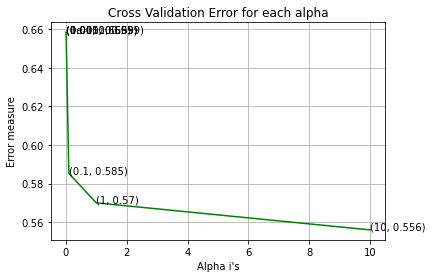

For values of best alpha =  10 The train log loss is: 0.5549567584721226
For values of best alpha =  10 The test log loss is: 0.5559463071119377
Total number of data points : 121287


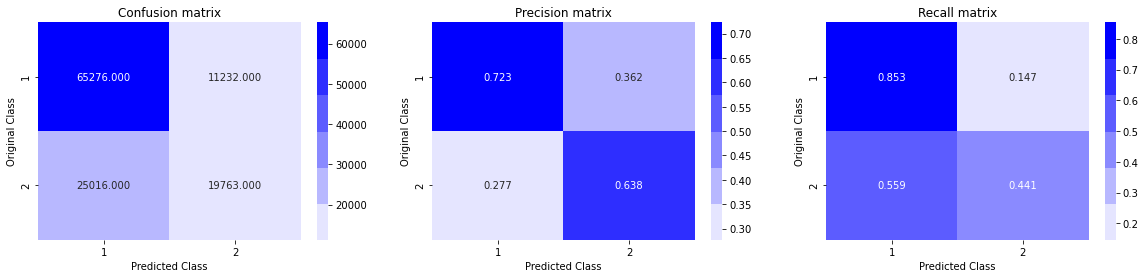

In [67]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
alpha = [10 ** x for x in range(-5, 2)]
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)